# Petisonda stuff
## Basic info
co-authors: MartinaL, PetrM, HonzaS, VojtechS

Description ...

<center>
Main result:
<img src="icon-fig.png" width=50%/>
    
Other results ...
</center>

## Procedure (<a href=notebook.ipynb>This notebook to download</a>)

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  6 17:58:19 2020

@author: martina
"""
import math
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rc,rcParams                             
from urllib.request import urlopen 
from scipy import signal
rc('font', weight='bold')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.spines.top'] = 'False'
plt.rcParams['axes.spines.right'] = 'False'

In [68]:
shot_no = 0
shot = str(shot_no)
das = ['PetiSonda','PetiSondaBolom']
for i in das:
    try:
        BPP = np.loadtxt(urlopen('http://golem.fjfi.cvut.cz/shots/' + (shot) +'/DASs/'+i+'/3-BPP.csv'),delimiter = ',')
        BPP[:,0] *= 1000 
        BPP[:,1] *= 100 
        TP_Lim = np.loadtxt(urlopen('http://golem.fjfi.cvut.cz/shots/' + (shot) +'/DASs/'+i+'/1-Lim.csv'),delimiter = ',')
        TP_Lim[:,0] *= 1000
        TP_Lim[:,1] *= 100
        TP_OLim = np.loadtxt(urlopen('http://golem.fjfi.cvut.cz/shots/' + (shot) +'/DASs/'+i+'/2-OLim.csv'),delimiter = ',')
        TP_OLim[:,0] *= 1000
        TP_OLim[:,1] *= 100
        LP = np.loadtxt(urlopen('http://golem.fjfi.cvut.cz/shots/' + (shot) +'/DASs/'+i+'/4-LP.csv'),delimiter = ',')
        LP[:,0] *= 1000
        LP[:,1] *= 100
        print(str(i) + ' loaded')
    except:
        print(str(i + ' not found'))
plasma_start = np.loadtxt(urlopen('http://golem.fjfi.cvut.cz/shots/'+str(shot)+'/analysis_wave_i/BasicDiagnostics/t_plasma_start'))
plasma_end = np.loadtxt(urlopen('http://golem.fjfi.cvut.cz/shots/'+str(shot)+'/analysis_wave_i/BasicDiagnostics/t_plasma_end'))
s = int(plasma_start*1000)+100;e=int(plasma_end*1000)-100
plasma_s = math.floor(plasma_start)-1; plasma_e = math.ceil(plasma_end)+1

PetiSonda not found
PetiSondaBolom loaded


In [30]:
signals = [BPP,TP_Lim,TP_OLim,LP]
def meze(data):
#     return np.min(data[s:e,1]),np.max(data[s:e,1])
    return np.min(signal.savgol_filter(data[s:e,1],51,2)),np.max(signal.savgol_filter(data[s:e,1],51,2))
mez = np.zeros((np.shape(signals)[0],2))
for i in range(np.shape(signals)[0]):
    mez[i] = meze(signals[i])

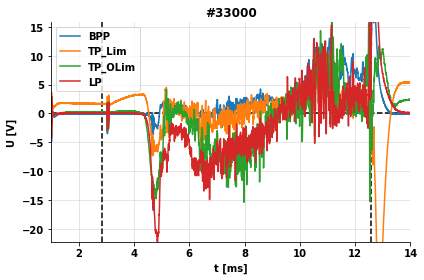

In [31]:
fig,ax = plt.subplots(1) 
ax.axhline(y = 0, linestyle = '--', color = 'black')
ax.axvline(x=plasma_start,color = 'black',linestyle = '--');ax.axvline(x=plasma_end,color = 'black',linestyle = '--')
ax.plot(BPP[:,0],BPP[:,1], label = 'BPP')
ax.plot(TP_Lim[:,0],TP_Lim[:,1], label = 'TP_Lim')
ax.plot(TP_OLim[:,0],TP_OLim[:,1], label = 'TP_OLim')
ax.plot(LP[:,0],LP[:,1], label = 'LP')
ax.set_xlabel('t [ms]')
ax.set_ylabel('U [V]')
ax.set_xlim(plasma_s,plasma_e)
ax.set_ylim(min(mez[:,0]),max(mez[:,1]))
ax.set_title('#'+str(shot),fontweight = 'bold')
ax.grid(b=True, alpha=0.4)
ax.legend()
plt.tight_layout()
plt.savefig('icon-fig')

In [32]:
Te = (BPP[:,1] - TP_OLim[:,1])/2.5

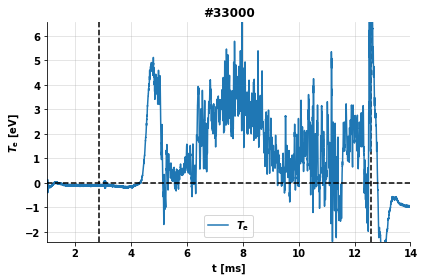

In [33]:
fig,ax = plt.subplots(1)
ax.axvline(x=plasma_start,color = 'black',linestyle = '--');ax.axvline(x=plasma_end,color = 'black',linestyle = '--')
ax.plot(BPP[:,0],Te[:], label = r'$T_\mathrm{e}$') 
ax.set_xlabel('t [ms]')
ax.set_ylabel(r'$T_\mathrm{e} \ \mathrm{[eV]}$')
ax.axhline(y = 0, linestyle = '--', color = 'black')
ax.set_xlim(plasma_s,plasma_e)
ax.set_ylim(np.min(Te[s:e]),np.max(Te[s:e]))
ax.set_title('#'+str(shot),fontweight = 'bold')
ax.grid(b=True, alpha=0.4)
ax.legend()
plt.tight_layout()

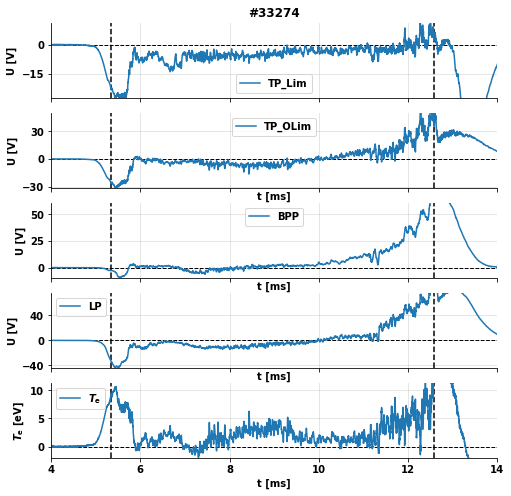

In [16]:
fig,ax = plt.subplots(5,figsize=(8, 8),sharex=True)
ax[0].axvline(x=plasma_start,color = 'black',linestyle = '--');ax[0].axvline(x=plasma_end,color = 'black',linestyle = '--')
ax[0].axhline(y = 0, linestyle = '--', color = 'black',linewidth = 1)
ax[0].plot(TP_Lim[:,0],TP_Lim[:,1], label = 'TP_Lim')
ax[0].set_ylabel('U [V]')
ax[0].set_xlim(plasma_s,plasma_e)
ax[0].set_ylim(meze(TP_Lim))
ax[0].set_title('#'+str(shot),fontweight = 'bold')
ax[0].legend()
ax[0].grid(b=True, alpha=0.4)
ax[0].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[1].axvline(x=plasma_start,color = 'black',linestyle = '--');ax[1].axvline(x=plasma_end,color = 'black',linestyle = '--')
ax[1].axhline(y = 0, linestyle = '--', color = 'black',linewidth = 1)
ax[1].plot(TP_OLim[:,0],TP_OLim[:,1], label = 'TP_OLim')
ax[1].set_xlabel('t [ms]')
ax[1].set_ylabel('U [V]')
ax[1].set_xlim(plasma_s,plasma_e)
ax[1].set_ylim(meze(TP_OLim))
ax[1].legend()
ax[1].grid(b=True, alpha=0.4)
ax[1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[2].axvline(x=plasma_start,color = 'black',linestyle = '--');ax[2].axvline(x=plasma_end,color = 'black',linestyle = '--')
ax[2].axhline(y = 0, linestyle = '--', color = 'black',linewidth = 1)
ax[2].plot(BPP[:,0],BPP[:,1], label = 'BPP')
ax[2].set_xlabel('t [ms]')
ax[2].set_ylabel('U [V]')
ax[2].set_xlim(plasma_s,plasma_e)
ax[2].set_ylim(meze(BPP))
ax[2].legend()
ax[2].grid(b=True, alpha=0.4)
ax[2].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[3].axvline(x=plasma_start,color = 'black',linestyle = '--');ax[3].axvline(x=plasma_end,color = 'black',linestyle = '--')
ax[3].axhline(y = 0, linestyle = '--', color = 'black',linewidth = 1)
ax[3].plot(LP[:,0],LP[:,1], label = 'LP')
ax[3].set_xlabel('t [ms]')
ax[3].set_ylabel('U [V]')
ax[3].set_xlim(plasma_s,plasma_e)
ax[3].set_ylim(meze(LP))
ax[3].legend()
ax[3].grid(b=True, alpha=0.4)
ax[3].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[4].axvline(x=plasma_start,color = 'black',linestyle = '--');ax[4].axvline(x=plasma_end,color = 'black',linestyle = '--')
ax[4].axhline(y=0,color = 'black',linestyle = '--',linewidth = 1)
ax[4].plot(BPP[:,0],Te[:], label = r'$T_\mathrm{e}$')
ax[4].set_xlabel('t [ms]')
ax[4].set_ylabel(r'$T_\mathrm{e} \ \mathrm{[eV]}$')
ax[4].set_xlim(plasma_s,plasma_e)
ax[4].set_ylim(np.min(Te[s:e]),np.max(Te[s:e]))
ax[4].legend()
ax[4].grid(b=True, alpha=0.4)
ax[4].yaxis.set_major_locator(plt.MaxNLocator(3))
